In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

import sys
import os

notebook_dir = os.getcwd()
model_path = os.path.abspath(os.path.join(notebook_dir, '..', 'Model'))
sys.path.append(model_path)

from elfarclass import ElFarolBar

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [5]:
folder_path = os.getcwd() + '/results' # Specify the folder containing the CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')] # Get a list of all CSV files in the folder
# take only the files containing the word 'sett'
csv_files = [f for f in csv_files if 'sett' in f]
dataframes = [] # Initialize an empty list to store DataFrames

# Loop through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    new_df = pd.read_csv(file_path)
    dataframes.append(new_df)
# Concatenate all DataFrames into a single DataFrame
df_res = pd.concat(dataframes, ignore_index=True)

df_res_q1 = df_res[(df_res.max_acft_attendance > 0.8) & (df_res.max_acft_contagious > 0.8)]

print(f'Number of rows in the dataset: {len(df_res)}')
print(f'Number of rows in the dataset with max_acft_attendance > 0.8 and max_acft_contagious > 0.8: {len(df_res_q1)}')

Number of rows in the dataset: 100000
Number of rows in the dataset with max_acft_attendance > 0.8 and max_acft_contagious > 0.8: 968


index: 216 - sim: 57055118 - period att: 12 - aft att: 0.88 - period ct: 6 - aft ct: 0.9


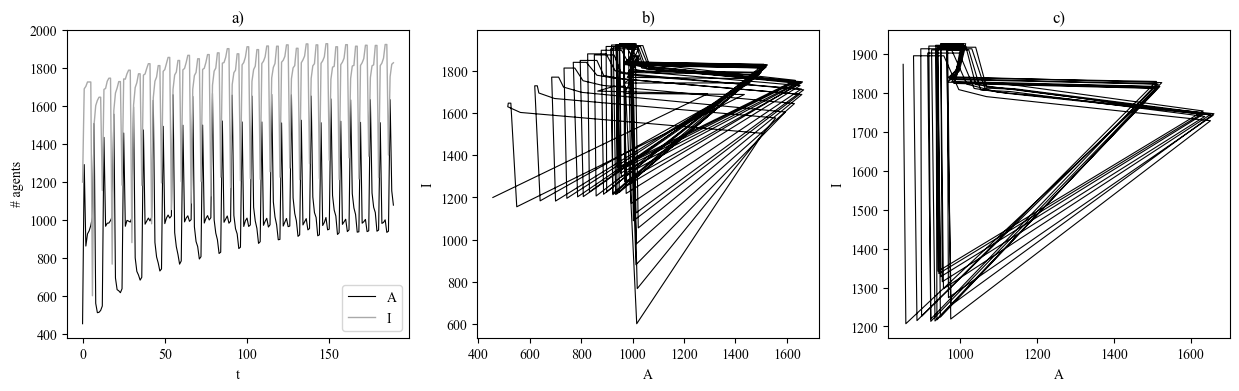

In [ ]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def make_plots(row):

    seed, num_weeks, num_agents, num_contagious_agents = int(row['seed']), int(row['num_weeks']), int(row['num_agents']), int(row['num_contagious_agents'])
    capacity, threshold, contagious_threshold, contagious_duration = row['capacity'], row['threshold'], row['contagious_threshold'], int(row['contagious_duration'])
    SIR_AgentsRecoveryTime, people_memory_weight, contagious_thresholdNotPresent = int(row['SIR_AgentsRecoveryTime']), row['people_memory_weight'], row['contagious_thresholdNotPresent']
    bar = ElFarolBar(
            seed = seed, num_agents=num_agents, num_contagious_agents=num_contagious_agents,
            capacity=capacity, threshold=threshold, contagious_threshold=contagious_threshold, contagious_duration=contagious_duration,
            SIR_AgentsRecoveryTime=SIR_AgentsRecoveryTime, people_memory_weight=people_memory_weight,contagious_thresholdNotPresent=contagious_thresholdNotPresent,
            Use_SIR=True, debugCSV=False
    )
    
    results = bar.simulate(num_weeks=num_weeks, respect_the_max=True)
    attendance_history,contagious_history, present_contagious_history = results[1][10:], results[2][10:], results[3][10:]
    id_aft_at, val_aft_at, id_aft_ct, val_aft_ct = int(row['argmax_acft_attendance']), round(row['max_acft_attendance'],2),int(row['argmax_acft_contagious']), round(row['max_acft_contagious'],2)
    
    index = row.name
    print(f'index: {index} - sim: {seed} - period att: {id_aft_at} - aft att: {val_aft_at} - period ct: {id_aft_ct} - aft ct: {val_aft_ct}')
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    
    ax[0].plot(attendance_history, label='A', c = 'black', linewidth=0.8)
    ax[0].plot(contagious_history,  label='I', c = 'darkgrey', linewidth=1)
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('# agents')
    ax[0].set_title(f'a)')
    ax[0].legend()
    
    ax[1].plot(attendance_history, contagious_history, c = 'black', linewidth=0.8)
    ax[1].set_xlabel('A')
    ax[1].set_ylabel('I')
    ax[1].set_title(f'b)')

    x, y = attendance_history[int(len(attendance_history)/2):], contagious_history[int(len(contagious_history)/2):]
    #x_mobile, y_mobile = moving_average(x, 10), moving_average(y, 10)
    ax[2].plot(x, y, c = 'black', linewidth=0.8, label = 'data')
    #ax[2].plot(x_mobile, y_mobile, c = 'skyblue', linewidth=1.5, label = 'moving average')
    ax[2].set_xlabel('A')
    ax[2].set_ylabel('I')
    ax[2].set_title(f'c)')

    plt.show()

index = 0
# get the row of index index
row = df_res_q1.iloc[index]
make_plots(row)

In [ ]:
i = 0
for index, row in df_res_q1.iterrows():
    if index < 0:
        continue
    elif i < 100000:
        make_plots(row)
    else:
        break
    i += 1